In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from matplotlib import pyplot as plt, font_manager as fm

In [83]:
milkData = pd.read_csv('milknew.csv')

In [84]:
milkData.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
milkData.shape

(1059, 8)

In [5]:
milkData.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
milkData.duplicated().sum()

976

In [7]:
milkData.loc[milkData.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [8]:
# Check missing values in data
milkData.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [9]:
# Listing out unique values in the dataset
milkData.nunique() 

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [10]:
milkData.info

<bound method DataFrame.info of        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0     6.6          35      1     0     1          0     254    high
1     6.6          36      0     1     0          1     253    high
2     8.5          70      1     1     1          1     246     low
3     9.5          34      1     1     0          1     255     low
4     6.6          37      0     0     0          0     255  medium
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[1059 rows x 8 columns]>

In [12]:
# Convert the dictionary into DataFrame
milkData1= pd.DataFrame(milkData)
  
# Remove column name 'A'
milkData2=milkData.drop(['Grade'], axis=1)
milkData2

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


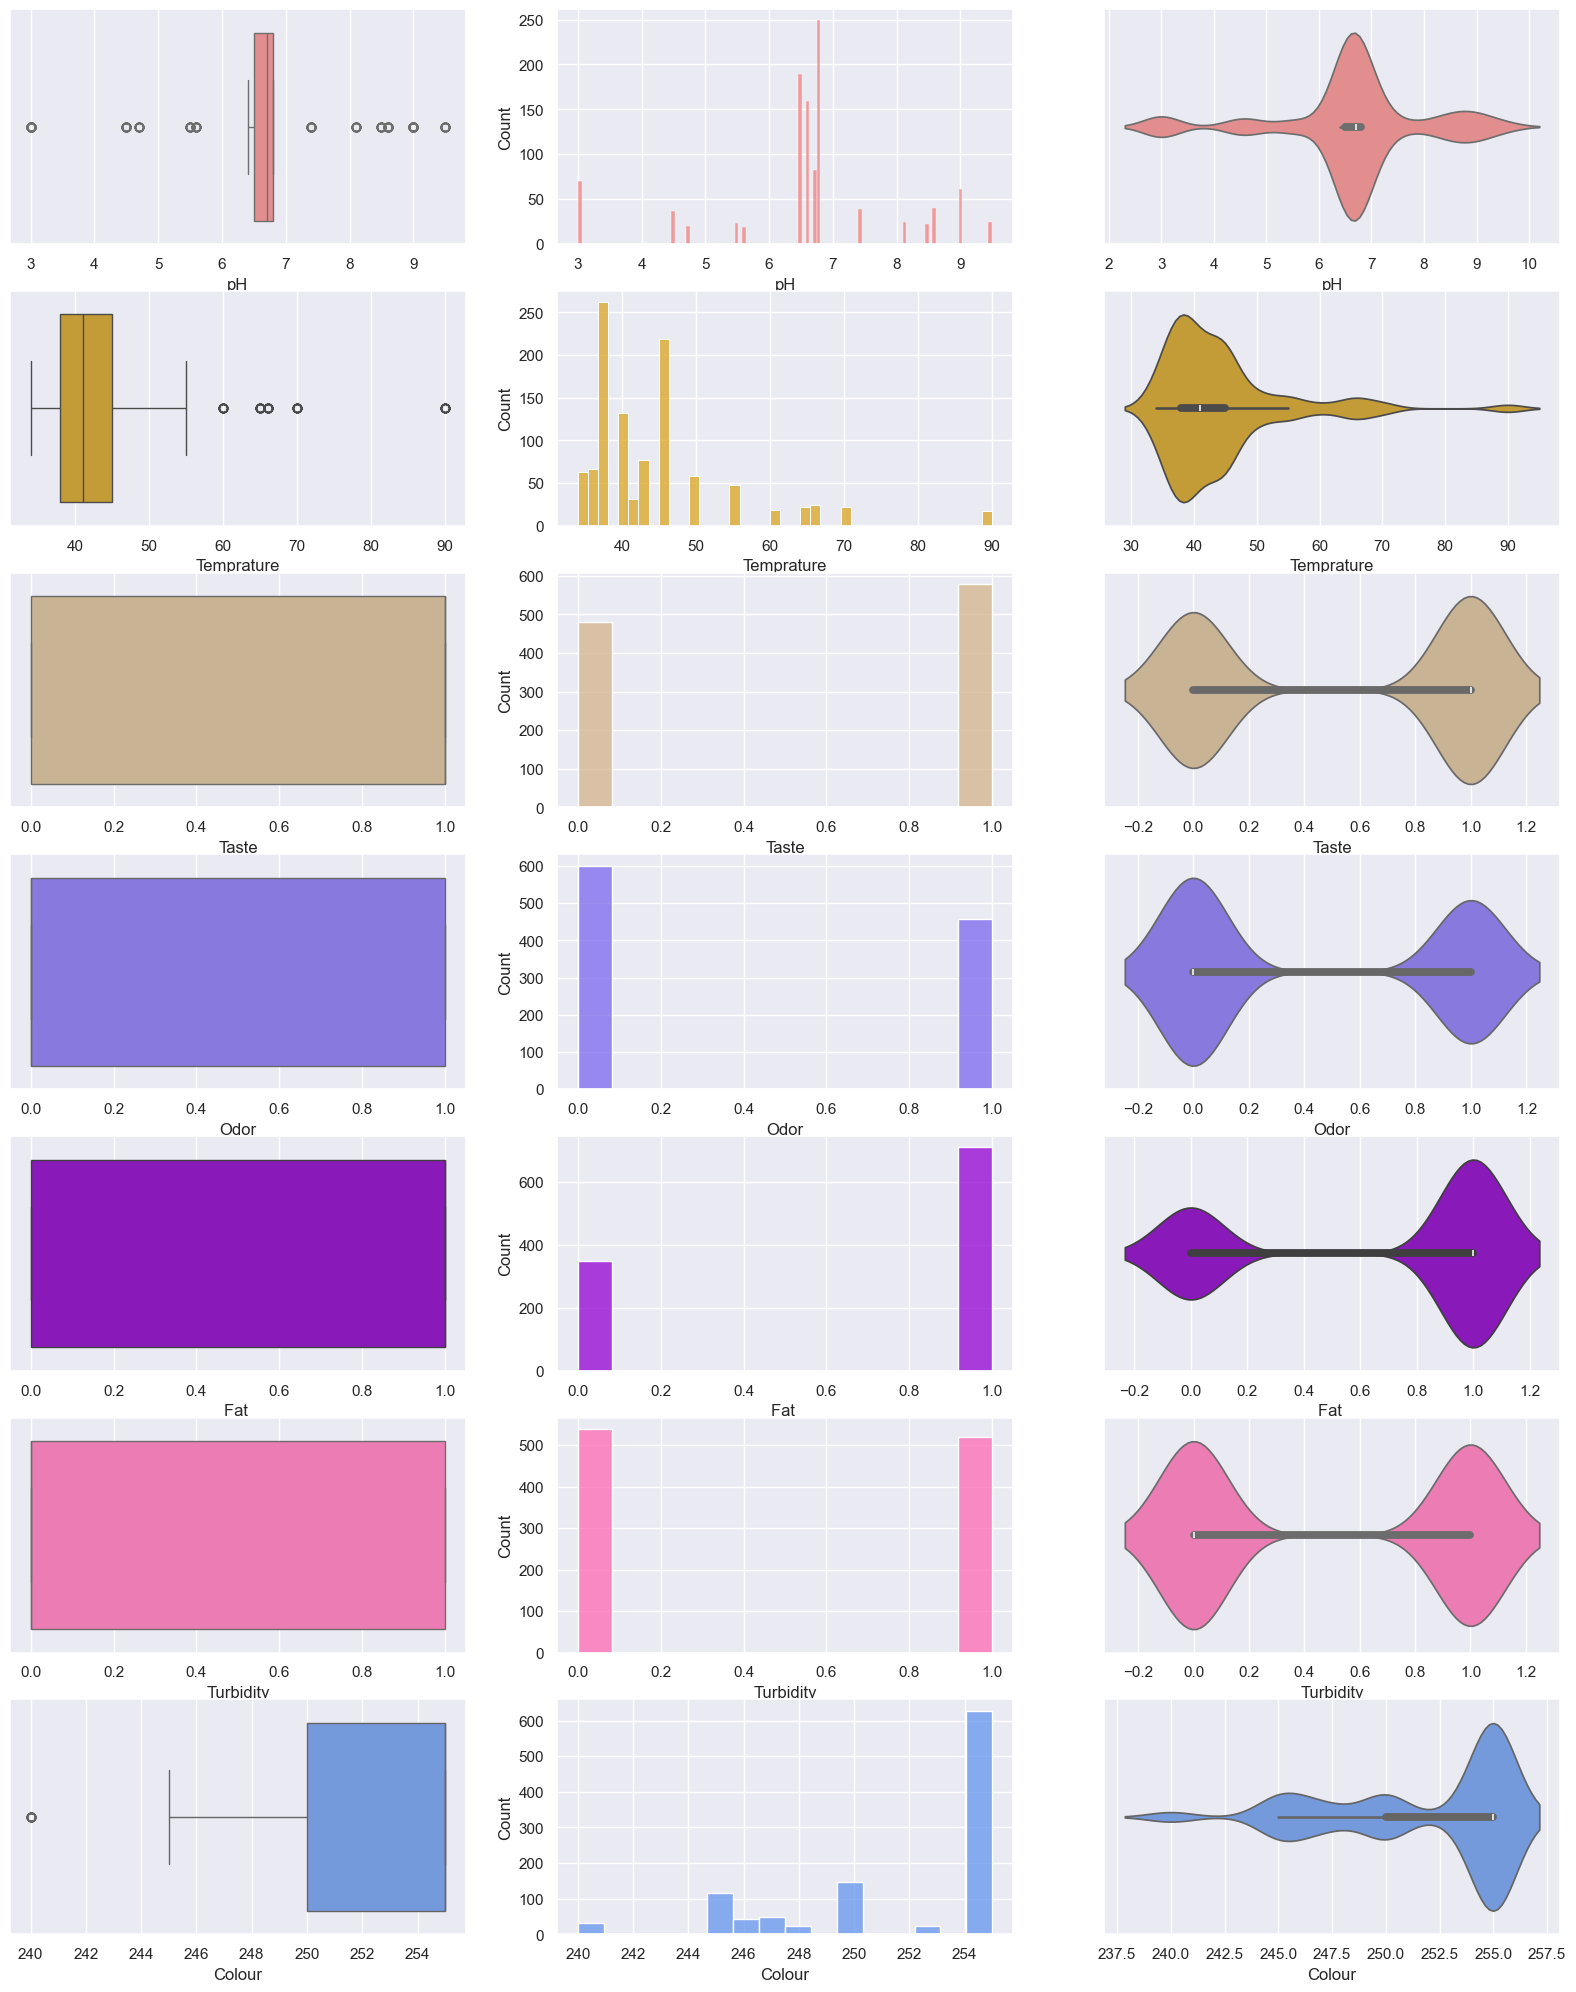

In [13]:
# Draw the distributions of all variables in boxplots, histograms, and violin plots.
f, axes = plt.subplots(7, 3, figsize=(20, 25))
colors = ["lightcoral", "goldenrod", "tan", "mediumslateblue", "darkviolet", "hotpink", "cornflowerblue", "dodgerblue", "royalblue", "mediumaquamarine", "teal", "firebrick"]

count = 0
for var in milkData2:
    sb.boxplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=milkData2[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

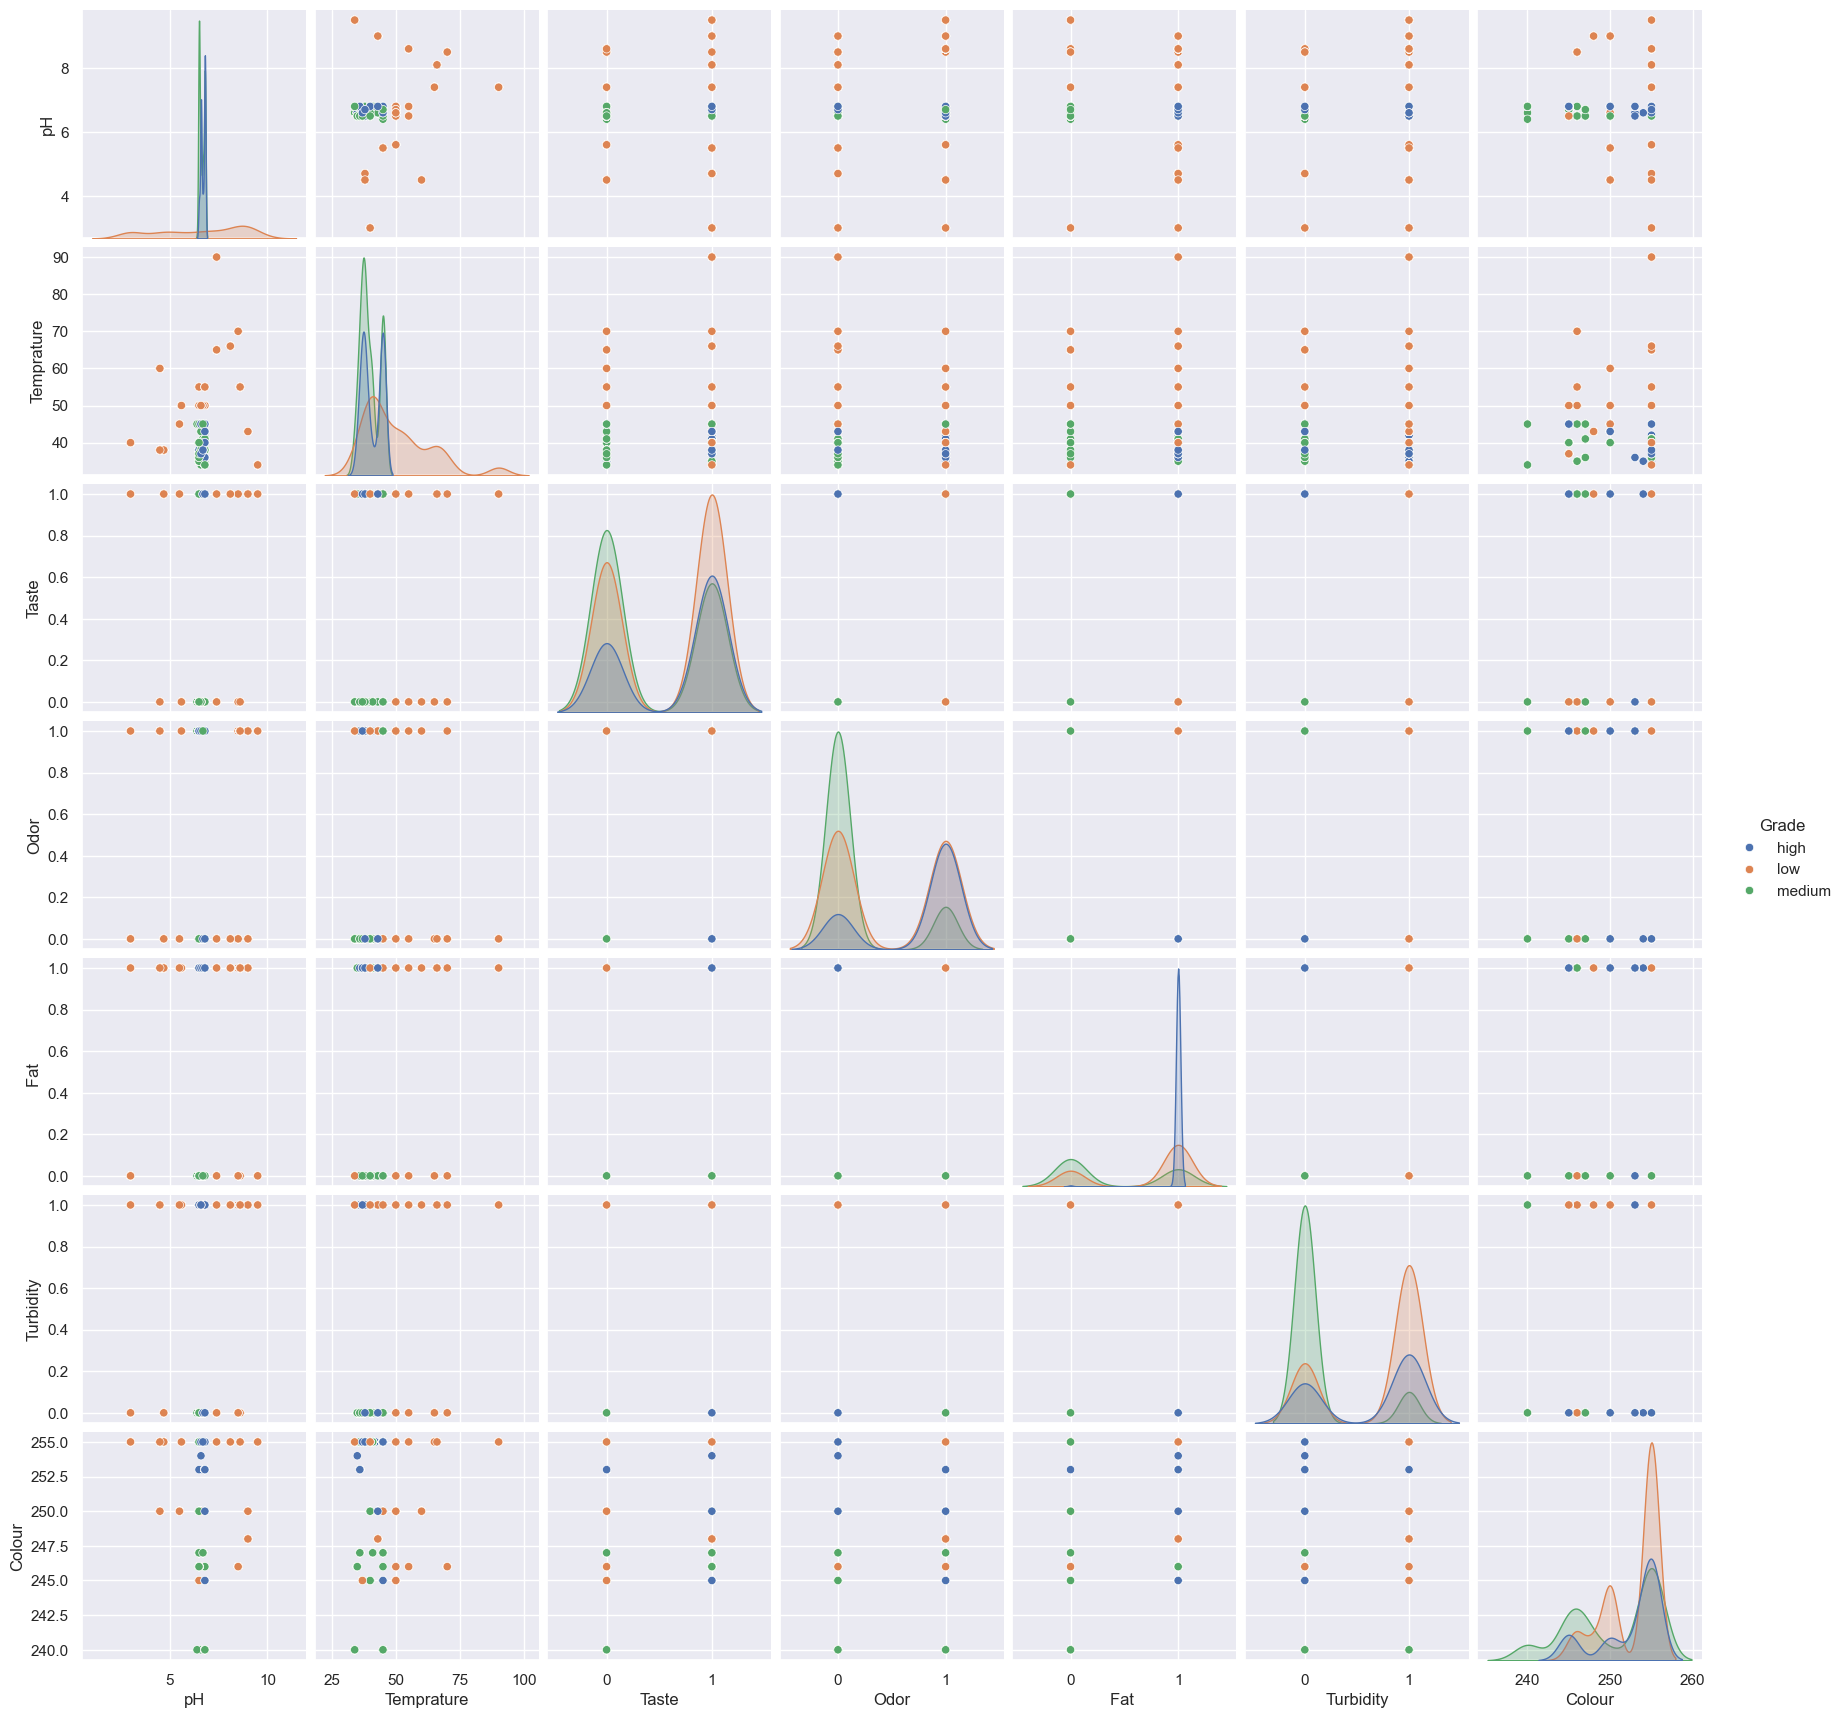

In [14]:
sb.pairplot(milkData,vars=milkData.columns[:-1],hue='Grade')

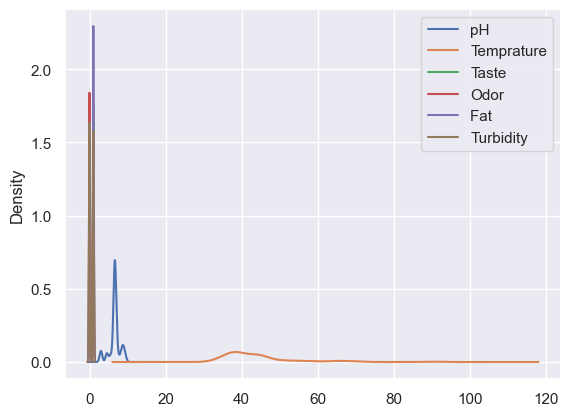

In [15]:
# Density plot
cols = milkData.columns[:6]
densityplot = milkData[cols].plot(kind='density')

In [16]:
#min, max , average for temperature
print('The lowest temperature in the Milk is '+ str(milkData['Temprature'].min()))
print('The highest temperature in the Milk is '+ str(milkData['Temprature'].max()))
print('The average temperature in the Milk is '+ str(round(milkData['Temprature'].mean(),3)))
#min, max, average for PH 
print('The lowest pH in the Milk is '+ str(milkData['pH'].min()))
print('The highest pH in the Milk is '+ str(milkData['pH'].max()))
print('The average pH in the Milk is '+ str(round(milkData['pH'].mean(),3)))
#min,max,averagr for colour
print('The lowest Colour in the Milk is '+ str(milkData['Colour'].min()))
print('The highest Colour in the Milk is '+ str(milkData['Colour'].max()))
print('The average Colour in the Milk is '+ str(round(milkData['Colour'].mean(),3)))

The lowest temperature in the Milk is 34
The highest temperature in the Milk is 90
The average temperature in the Milk is 44.227
The lowest pH in the Milk is 3.0
The highest pH in the Milk is 9.5
The average pH in the Milk is 6.63
The lowest Colour in the Milk is 240
The highest Colour in the Milk is 255
The average Colour in the Milk is 251.84


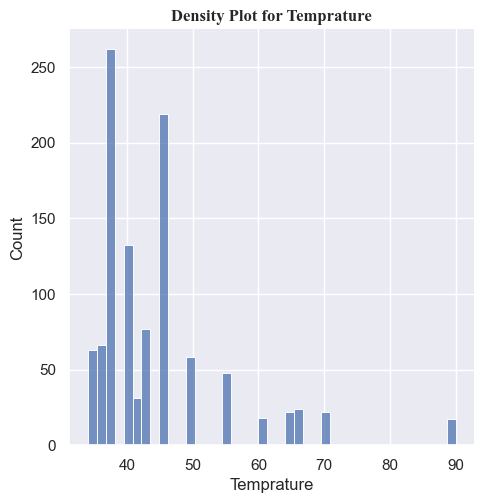

In [17]:
sb.displot(milkData['Temprature'], color = 'b')
plt.title("Density Plot for Temprature",fontname="Times New Roman", size=12 ,fontweight="bold" )
plt.show()

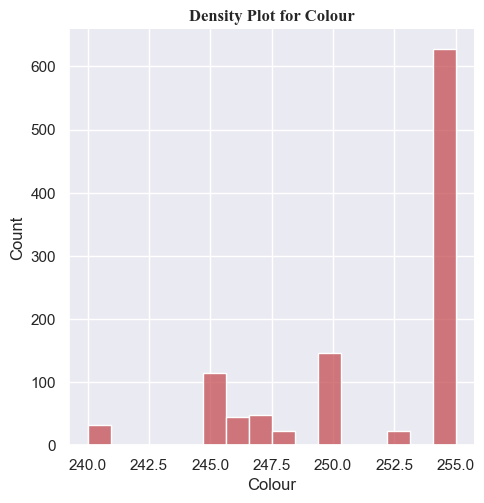

In [18]:
sb.displot(milkData['Colour'], color = 'r')
plt.title("Density Plot for Colour",fontname="Times New Roman", size=12 ,fontweight="bold" )
plt.show()

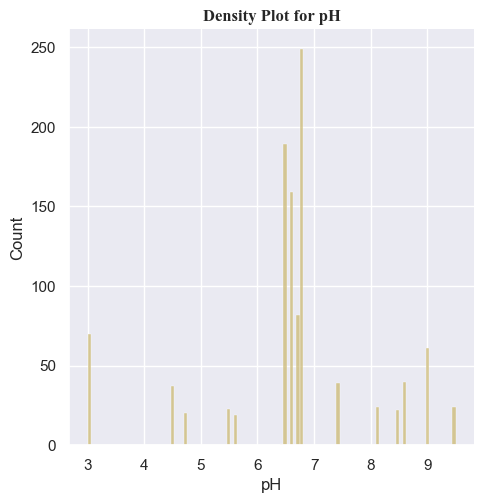

In [80]:
sb.displot(milkData['pH'], color = 'y')
plt.title("Density Plot for pH",fontname="Times New Roman", size=12 ,fontweight="bold" )
plt.show()

In [81]:
milkData.Grade.value_counts()

Grade
0    1059
Name: count, dtype: int64

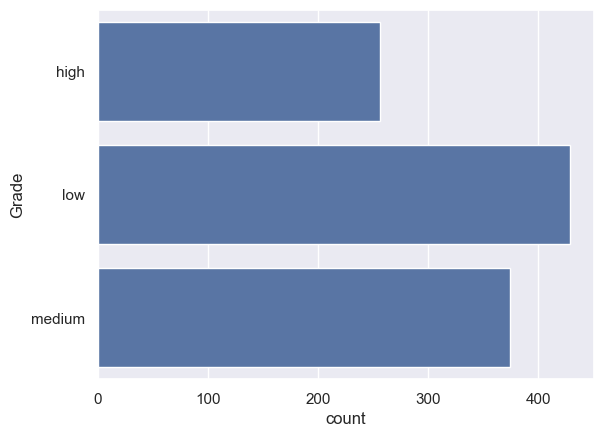

In [85]:
sb.countplot(milkData['Grade'])
plt.show()

                  pH  Temprature     Taste      Odor      Fat   Turbidity  \
pH          1.000000    0.244684 -0.064053 -0.081331 -0.093429   0.048384   
Temprature  0.244684    1.000000 -0.109792 -0.048870  0.024073   0.185106   
Taste      -0.064053   -0.109792  1.000000  0.017582  0.324149   0.055755   
Odor       -0.081331   -0.048870  0.017582  1.000000  0.314505   0.457935   
Fat        -0.093429    0.024073  0.324149  0.314505  1.000000   0.329264   
Turbidity   0.048384    0.185106  0.055755  0.457935  0.329264   1.000000   
Colour     -0.164565   -0.008511 -0.082654 -0.039361  0.114151   0.136436   
Grade      -0.012518   -0.094232 -0.197629 -0.454609 -0.501070  -0.428017   

              Colour     Grade  
pH         -0.164565 -0.012518  
Temprature -0.008511 -0.094232  
Taste      -0.082654 -0.197629  
Odor       -0.039361 -0.454609  
Fat         0.114151 -0.501070  
Turbidity   0.136436 -0.428017  
Colour      1.000000 -0.212994  
Grade      -0.212994  1.000000  


<Axes: >

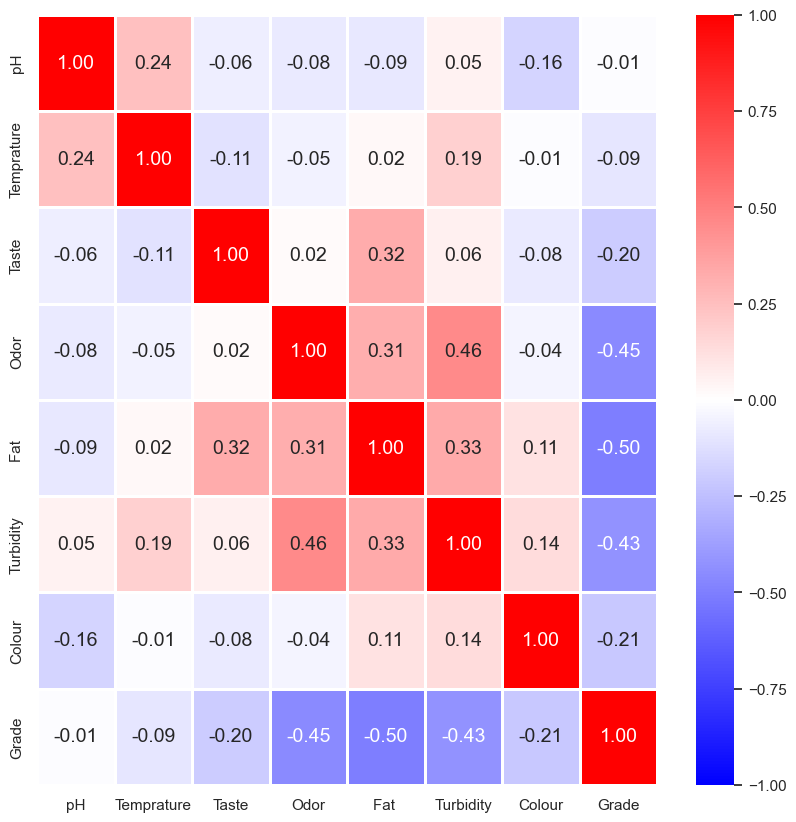

In [89]:
# Heatmap of the Correlation Matrix

print(milkData.corr())

# Now proceed with your heatmap
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(milkData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")


In [90]:
# Feature Engineering
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
milkData['Grade']= label_encoder.fit_transform(milkData['Grade'])

In [88]:
milkData.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [91]:
#Model
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix 


In [92]:
#splinting into train and test 
x= milkData.drop(['Grade'],axis=1)
y= milkData['Grade']
# Splitting out dataset into train and test set with test size 30% of entire dataset
# Standardization of data 

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)
 
# Generating the standardized values of X and y
x=PredictorScalerFit.transform(x)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [93]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (741, 7)
X Test  :  (318, 7)
Y Train :  (741,)
Y Test  :  (318,)


In [94]:
#This is for the test dataset 
model=GaussianNB()
model.fit(X_train,y_train)
X_test_predict_gnb =model.predict(X_test)
print('The accuracy of the Gaussian Naive Bayes model (Test Dataset) is',metrics.accuracy_score(X_test_predict_gnb,y_test))
#This is for the train dataset 
model=GaussianNB()
model.fit(X_test,y_test)
X_train_predict_gnb =model.predict(X_train)
print('The accuracy of the Gaussian Naive Bayes model (Train Dataset) is',metrics.accuracy_score(X_train_predict_gnb,y_train))

The accuracy of the Gaussian Naive Bayes model (Test Dataset) is 0.9025157232704403
The accuracy of the Gaussian Naive Bayes model (Train Dataset) is 0.8272604588394062


In [95]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
X_test_predict_rfc =model.predict(X_test)
print('The accuracy of the Random Forests model is (Test Dataset', metrics.accuracy_score(X_test_predict_rfc,y_test))

#This is for the train dataset 
model = RandomForestClassifier(n_estimators=100)
model.fit(X_test,y_test)
X_train_predict_rfc =model.predict(X_train)
print('The accuracy of the Random Forests model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_rfc,y_train))

The accuracy of the Random Forests model is (Test Dataset 0.9968553459119497
The accuracy of the Random Forests model is (Train Dataset)  0.9986504723346828


In [96]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
X_test_predict_knn = model.predict(X_test)
print('The accuracy for KNN classifier model is (Test Dataset)', metrics.accuracy_score(X_test_predict_knn,y_test))

#This is for the train dataset 
model = KNeighborsClassifier()
model.fit(X_test,y_test)
X_train_predict_knn =model.predict(X_train)
print('The accuracy for KNN classifier model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_knn,y_train))

The accuracy for KNN classifier model is (Test Dataset) 0.9937106918238994
The accuracy for KNN classifier model is (Train Dataset)  0.9568151147098516


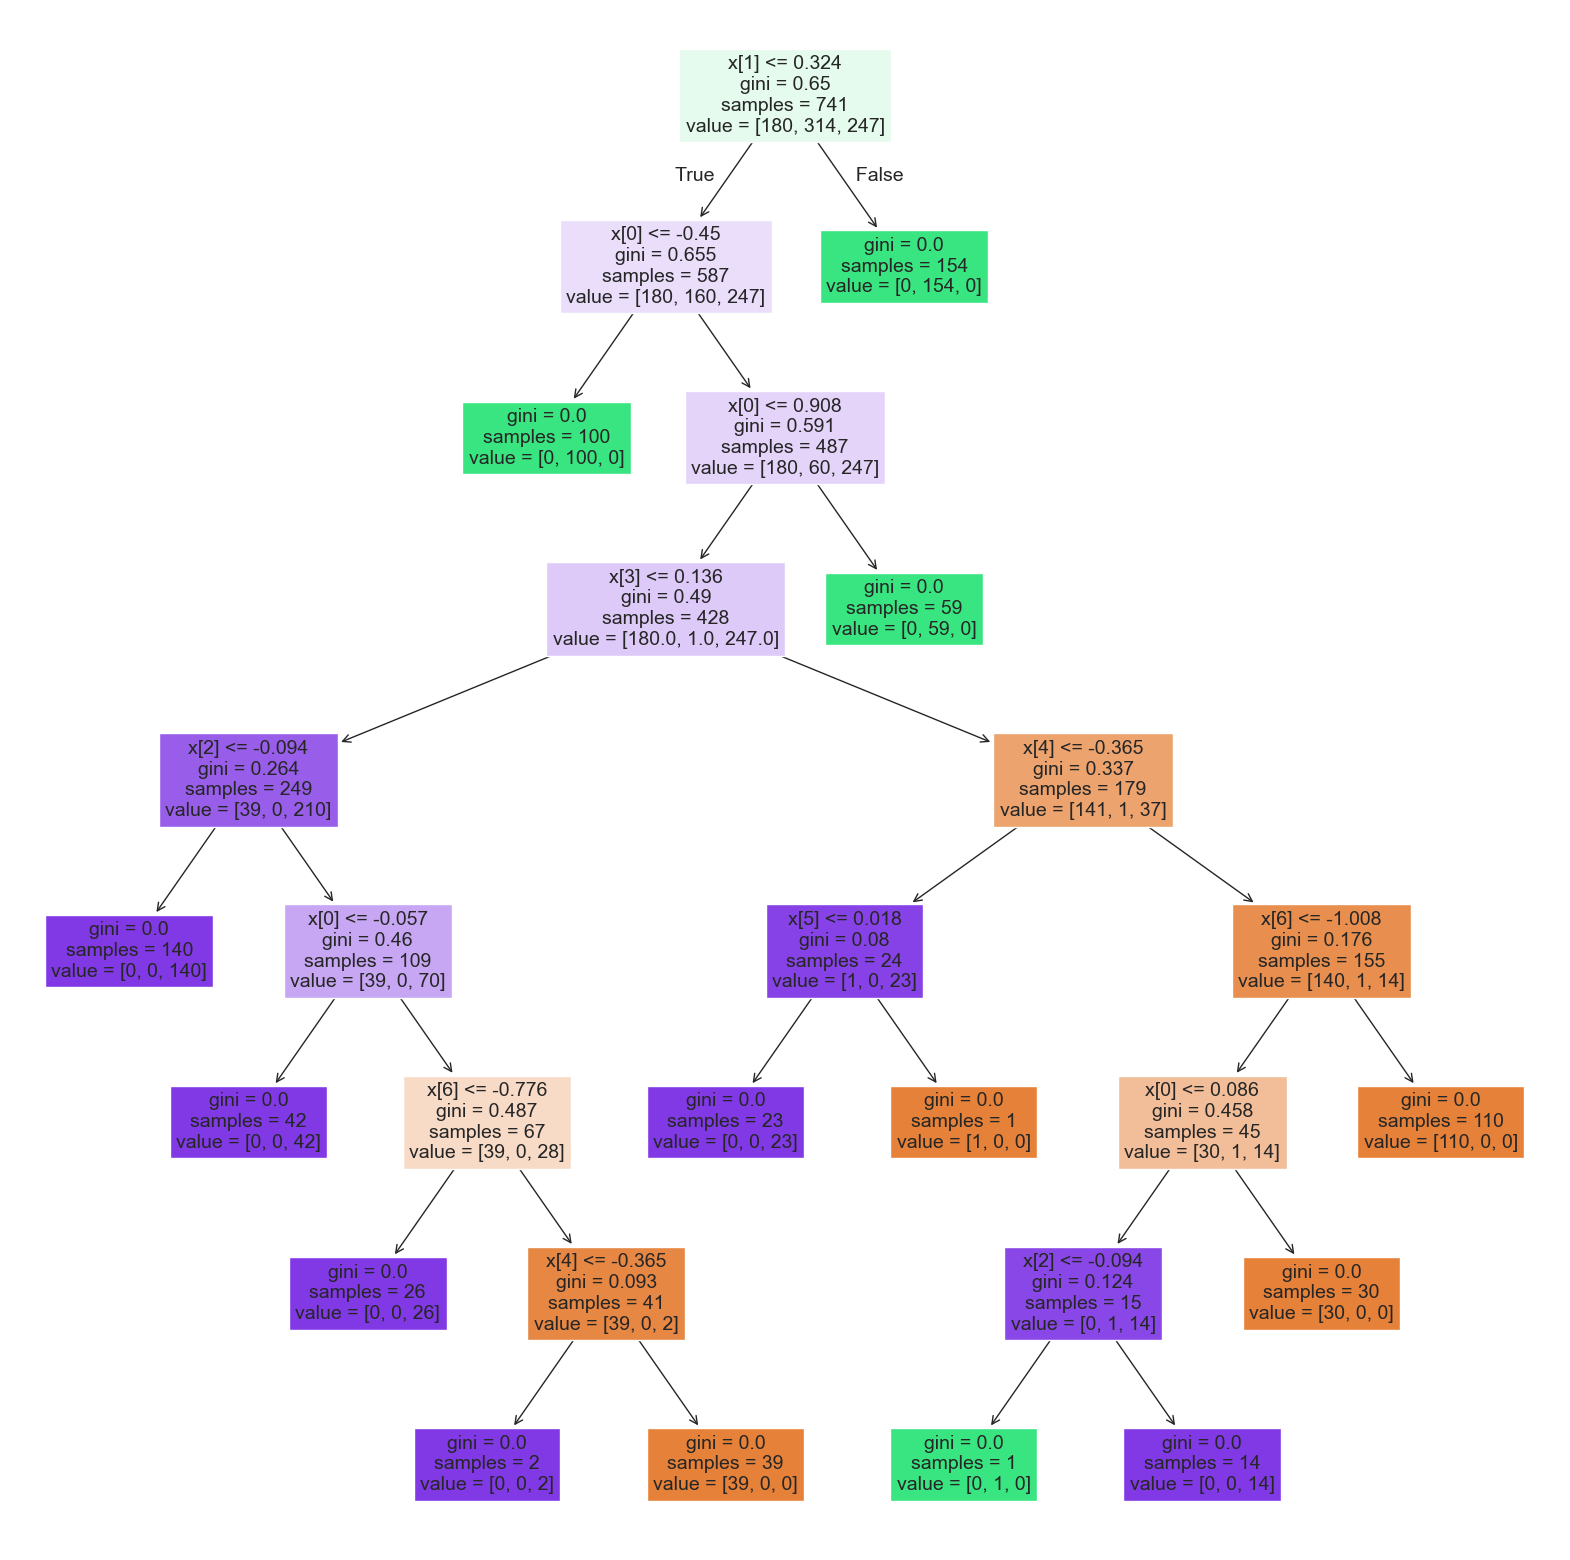

In [97]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(clf, filled=True)
plt.show()
